In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import math
digits = load_digits()

digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

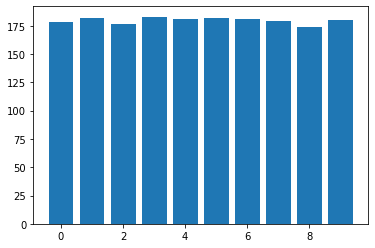

In [3]:
from collections import Counter

digit_count = dict(Counter(digits.target))
plt.bar(list(digit_count.keys()), list(digit_count.values()))
plt.show()

<Figure size 432x288 with 0 Axes>

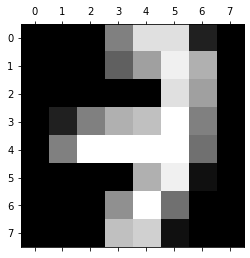

In [4]:
import matplotlib.pyplot as plt
plt.gray() 
plt.matshow(digits.images[27]) 
plt.show()

In [5]:
print(digits.images.shape)

(1797, 8, 8)


In [6]:
def activate(x):
    return 1/(1 + math.exp(-x))

def cost(y, x):
    size = np.ma.size(y, axis=0)
    diff = np.subtract(y, x)
    square_of_diff = np.square(diff)
    cost = np.sum(square_of_diff)/(2*size)
    return cost

In [7]:
image = digits.images[0].flatten()
image = np.append(image, [1])
image

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.,  1.])

In [9]:
images = digits.images.reshape(1797, 64)

In [51]:
weights = np.zeros((65, 10))
costs_array = []

In [70]:
learning_rate = 0.1
dataset_size = np.ma.size(images, axis=0)
# weights = np.random.rand(65, 10)

for image, target in zip(images[:1000], digits.target[:1000]):
    image = np.append(image, [1])
    Z = np.dot(image, weights)
    A = np.vectorize(activate)(Z)
    
    output = np.zeros(10)
    output[target] = 1
    
    
    const = learning_rate*(1/dataset_size)*(1 - A[target])*(A[target]*(1-A[target]))
    partial_function = const*image
    modified_weights = np.take(weights, target, axis=1) - partial_function
    weights.T[target] = modified_weights
    costs_array.append(cost(output, A))

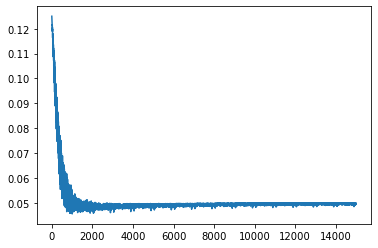

In [71]:
plt.plot(costs_array)

In [95]:
import random

chosen_index = random.randint(0, 1797)
print("actual value = ", digits.target[chosen_index])

output = np.zeros(10)
output[digits.target[chosen_index]] = 1

image = digits.images[chosen_index].reshape(64)
image = np.append(image, [1])
Z = np.dot(image, weights)
A = np.vectorize(activate)(Z)
print("predicted value = ", np.argmax(A))
print(output)
print(Z)
print(A)

actual value =  2
predicted value =  4
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[-3.63683493 -3.73433811 -4.77451939 -4.55978353 -3.08864702 -4.01576295
 -3.66335655 -3.74454802 -4.13985381 -3.90455487]
[0.0256598  0.02333161 0.00837147 0.01035596 0.04357799 0.0177099
 0.025005   0.02310008 0.01567554 0.01975192]


<AxesSubplot:>

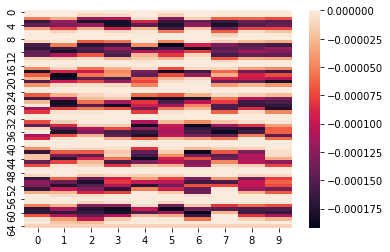

In [190]:
import seaborn as sns

sns.heatmap(weights)

In [48]:
learning_rate = 0.1
dataset_size = np.ma.size(images, axis=0)
costs_array = []
hidden_layer_size = 6400
weights_layer_1 = np.zeros((65, hidden_layer_size))
weights_layer_2 = np.zeros((hidden_layer_size, 10))

for image, target in zip(images, digits.target):
    image = np.append(image, [1])
    Z_1 = np.dot(image, weights_layer_1)
    A_1 = np.vectorize(activate)(Z_1)
    
    Z_2 = np.dot(A_1, weights_layer_2)
    A_2 = np.vectorize(activate)(Z_2)
    
    output = np.zeros(10)
    output[target] = 1
    
    
    const = learning_rate*(1/dataset_size)*(1 - A[target])*(A[target]*(1-A[target]))
    partial_function = const*image
    modified_weights_layer_1 = np.take(weights_layer_1, target, axis=1) - partial_function
    weights_layer_1.T[target] = modified_weights
    costs_array.append(cost(output, A))

NameError: name 'Z1' is not defined

In [ ]:
import random

chosen_index = random.randint(0, 1797)
print("actual value = ", digits.target[chosen_index])

output = np.zeros(10)
output[digits.target[chosen_index]] = 1

image = digits.images[chosen_index].reshape(64)
image = np.append(image, [1])
Z = np.dot(image, weights)
A = np.vectorize(activate)(Z)
print(output)
Z_1 = np.dot(image, weights_layer_1)
A_1 = np.vectorize(activate)(Z1)

Z_2 = np.dot(A_1, weights_layer_2)
A_2 = np.vectorize(activate)(Z2)
print(A_2)